In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math


df = pd.read_csv("mesc_thresholded.csv", index_col=0)
df["sorted_pair"] = df.apply(lambda row: tuple(sorted([row['node_a'], row['node_b']])), axis=1)
df= df.drop_duplicates(subset=['sorted_pair', "cluster_label", "fold"])

In [2]:
sorted_pair = ("Cont", "Limbic")
subdf = df[df.sorted_pair == sorted_pair]
rng = np.random.default_rng(seed=2024)
n_perm = 10000

assert n_perm <= math.perm(8)

pd.options.mode.copy_on_write = True

realised_means = subdf.groupby("cluster_label").pattern_value.mean()
stable, slow, steep = realised_means.values
realised_stat = stable - slow
permuted_stats = []
for idx in range(n_perm):
    subdf.loc[:, "permuted_pattern"] = subdf.pattern_value.sample(frac=1)
    pstable, pslow, psteep = subdf.groupby("cluster_label").permuted_pattern.mean()
    permuted_stats.append(pstable - pslow)



In [3]:
len(np.unique(permuted_stats))

10000

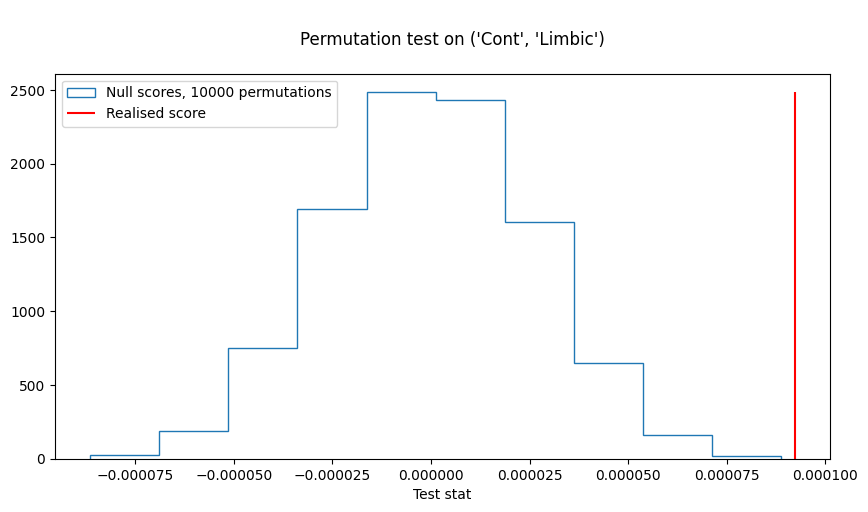

In [4]:
f, ax = plt.subplots(figsize=(10, 5))
h = ax.hist(permuted_stats, histtype="step", label=f"Null scores, {n_perm} permutations")
ax.vlines(realised_stat, ymin=0, ymax=np.max(h[0]), color="red", label="Realised score")
ax.set_title(
    f"""
    Permutation test on {sorted_pair}
    """
)
ax.legend(loc="upper left")
ax.set_xlabel("Test stat")
plt.show()